In [1]:
#Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

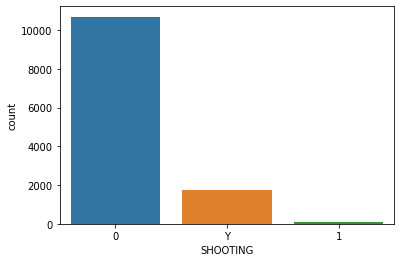

In [2]:
ab = pd.read_csv('/Users/ronakmehta/Documents/Crimes in Boston/analyseboston.csv',encoding='utf-8')
sns.countplot(data=ab, x = 'SHOOTING', label='Count')

In [3]:
ab['SHOOTING'] = ab['SHOOTING'].map({'Y':1,'1':1,'0':0})

In [4]:
ab['SHOOTING'].fillna(0, inplace=True)

In [5]:
ab.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     10781
OFFENSE_DESCRIPTION        0
DISTRICT                2229
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               10891
STREET                 13524
Lat                    37985
Long                   37985
Location                   0
dtype: int64

In [6]:
print("Unique Values of UCR_PART column",ab.UCR_PART.unique())

Unique Values of UCR_PART column [nan 'Part One' 'Part Three' 'Part Two' 'Other']


In [7]:
ab.loc[ab['OFFENSE_DESCRIPTION']=='SICK ASSIST']

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0.0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
303901,192090751,3005,NaN,SICK ASSIST,C11,337,0.0,2019-11-08 21:07:00,2019,11,Friday,21,NaN,COLUMBIA RD,NaN,NaN,"(0.00000000, 0.00000000)"
305067,192090637,3005,NaN,SICK ASSIST,D14,779,0.0,2019-11-08 13:15:00,2019,11,Friday,13,NaN,MAPLETON ST,NaN,NaN,"(0.00000000, 0.00000000)"
306458,192090211,3005,NaN,SICK ASSIST,A1,80,0.0,2019-11-06 23:57:00,2019,11,Wednesday,23,NaN,SNOW HILL ST,NaN,NaN,"(0.00000000, 0.00000000)"
311525,192089650,3005,NaN,SICK ASSIST,A15,50,0.0,2019-11-05 09:19:00,2019,11,Tuesday,9,NaN,RUTHERFORD AVE,NaN,NaN,"(0.00000000, 0.00000000)"
314946,192089309,3005,NaN,SICK ASSIST,A1,75,0.0,2019-10-30 18:26:00,2019,10,Wednesday,18,NaN,MERRIMAC ST,NaN,NaN,"(0.00000000, 0.00000000)"
319512,192088766,3005,NaN,SICK ASSIST,D14,800,0.0,2019-11-02 01:24:00,2019,11,Saturday,1,NaN,BRIGHTON AVE,NaN,NaN,"(0.00000000, 0.00000000)"
323894,192087463,3005,NaN,SICK ASSIST,C11,344,0.0,2019-10-28 22:56:00,2019,10,Monday,22,NaN,CORONA ST,NaN,NaN,"(0.00000000, 0.00000000)"
324723,192087352,3005,NaN,SICK ASSIST,B2,330,0.0,2019-10-28 17:09:00,2019,10,Monday,17,NaN,BLUE HILL AVENUE,NaN,NaN,"(0.00000000, 0.00000000)"
324987,192087351,3005,NaN,SICK ASSIST,A1,111,0.0,2019-10-28 16:42:00,2019,10,Monday,16,NaN,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [8]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'SICK ASSIST']
l['OFFENSE_CODE_GROUP'].isnull().sum()

456

In [9]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'SICK ASSIST', 'OFFENSE_CODE_GROUP']='Sick Assist'

In [10]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'VANDALISM']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

414


array([nan, 'Vandalism'], dtype=object)

In [11]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'VANDALISM', 'OFFENSE_CODE_GROUP']='Vandalism'

In [12]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - AGGRAVATED']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

335


array([nan, 'Aggravated Assault'], dtype=object)

In [13]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - AGGRAVATED', 'OFFENSE_CODE_GROUP']='Aggravated Assault'

In [14]:
ab.loc[ab.OFFENSE_CODE_GROUP.isnull()]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
303342,192090758,3301,NaN,VERBAL DISPUTE,D4,619,0.0,2019-11-08 21:20:00,2019,11,Friday,21,NaN,MASSACHUSETTS AVE,NaN,NaN,"(0.00000000, 0.00000000)"
303602,192090753,3112,NaN,LANDLORD - TENANT,C11,377,0.0,2019-11-08 21:27:00,2019,11,Friday,21,NaN,BOUTWELL ST,NaN,NaN,"(0.00000000, 0.00000000)"
303825,192090752,3115,NaN,INVESTIGATE PERSON,C6,214,0.0,2019-11-08 21:39:00,2019,11,Friday,21,NaN,W BROADWAY,NaN,NaN,"(0.00000000, 0.00000000)"
304693,192090696,3301,NaN,VERBAL DISPUTE,B2,267,0.0,2019-11-08 17:45:00,2019,11,Friday,17,NaN,DUDLEY ST,NaN,NaN,"(0.00000000, 0.00000000)"
305029,192090638,613,NaN,LARCENY SHOPLIFTING,D4,,0.0,2019-11-08 15:24:00,2019,11,Friday,15,NaN,RING RD,NaN,NaN,"(0.00000000, 0.00000000)"
305625,192090636,2610,NaN,TRESPASSING,B3,465,0.0,2019-11-04 23:50:00,2019,11,Monday,23,NaN,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
305662,192090372,3115,NaN,INVESTIGATE PERSON,A1,,0.0,2019-11-07 02:39:00,2019,11,Thursday,2,NaN,CHATHAM ST,NaN,NaN,"(0.00000000, 0.00000000)"
306381,192090264,3801,NaN,M/V ACCIDENT - OTHER,A1,,0.0,2019-11-07 09:08:00,2019,11,Thursday,9,NaN,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
306606,192090210,801,NaN,ASSAULT - SIMPLE,D14,769,0.0,2019-11-06 23:45:00,2019,11,Wednesday,23,NaN,MARKET ST,NaN,NaN,"(0.00000000, 0.00000000)"
308711,192090209,3301,NaN,VERBAL DISPUTE,D4,623,0.0,2019-11-06 23:13:00,2019,11,Wednesday,23,NaN,COMMONWEALTH AVE,NaN,NaN,"(0.00000000, 0.00000000)"


In [15]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PERSON']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

837


array(['Investigate Person', 'INVESTIGATE PERSON', nan], dtype=object)

In [16]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PERSON', 'OFFENSE_CODE_GROUP']='Investigate Person'

In [17]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'VERBAL DISPUTE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

887


array(['Verbal Disputes', nan], dtype=object)

In [18]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'VERBAL DISPUTE', 'OFFENSE_CODE_GROUP']='Verbal Disputes'

In [19]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PROPERTY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

400


array(['Investigate Property', nan], dtype=object)

In [20]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'INVESTIGATE PROPERTY', 'OFFENSE_CODE_GROUP']='Investigate Property'

In [21]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - SIMPLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

739


array(['Simple Assault', nan], dtype=object)

In [22]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'ASSAULT - SIMPLE', 'OFFENSE_CODE_GROUP']='Simple Assault'

In [23]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'AUTO THEFT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

115


array(['Auto Theft', nan], dtype=object)

In [24]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'AUTO THEFT', 'OFFENSE_CODE_GROUP']='Auto Theft'

In [25]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'TRESPASSING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

91


array(['Other', nan], dtype=object)

In [26]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'TRESPASSING', 'OFFENSE_CODE_GROUP']='Other'

In [27]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY SHOPLIFTING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

277


array(['Larceny', nan], dtype=object)

In [28]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY SHOPLIFTING', 'OFFENSE_CODE_GROUP']='Larceny'

In [29]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

142


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [30]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [31]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER CITY VEHICLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

21


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [32]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - OTHER CITY VEHICLE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [33]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'TOWED MOTOR VEHICLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

354


array(['Towed', nan], dtype=object)

In [34]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'TOWED MOTOR VEHICLE','OFFENSE_CODE_GROUP']='Towed'

In [35]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LANDLORD - TENANT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

32


array([nan], dtype=object)

In [36]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LANDLORD - TENANT','OFFENSE_CODE_GROUP']='Landlord/Tenant Disputes'

In [37]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - POLICE VEHICLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

28


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [38]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - POLICE VEHICLE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [39]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - FOUND']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

101


array(['Property Found', nan], dtype=object)

In [40]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - FOUND','OFFENSE_CODE_GROUP']='Property Found'

In [41]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'MISSING PERSON']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

125


array(['Missing Person Reported', nan], dtype=object)

In [42]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'MISSING PERSON','OFFENSE_CODE_GROUP']='Missing Person Reported'

In [43]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'BURGLARY - RESIDENTIAL']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

153


array([nan], dtype=object)

In [44]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'BURGLARY - RESIDENTIAL','OFFENSE_CODE_GROUP']='Residential Burglary'

In [45]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LICENSE PREMISE VIOLATION']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

74


array(['License Violation', nan], dtype=object)

In [46]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LICENSE PREMISE VIOLATION','OFFENSE_CODE_GROUP']='License Violation'

In [47]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

268


array([nan], dtype=object)

In [48]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE','OFFENSE_CODE_GROUP']='Drug Violation'

In [49]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'VAL - VIOLATION OF AUTO LAW']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

90


array([nan], dtype=object)

In [50]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'VAL - VIOLATION OF AUTO LAW','OFFENSE_CODE_GROUP']='Other'

In [51]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'SUDDEN DEATH']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

36


array(['Medical Assistance', nan], dtype=object)

In [52]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'SUDDEN DEATH','OFFENSE_CODE_GROUP']='Medical Assistance'

In [53]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY ALL OTHERS']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

203


array(['Larceny', nan], dtype=object)

In [54]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY ALL OTHERS','OFFENSE_CODE_GROUP']='Larceny'

In [55]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'FIRE REPORT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

36


array([nan], dtype=object)

In [56]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'FIRE REPORT','OFFENSE_CODE_GROUP']='Fire Related Reports'

In [57]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - LOST/ MISSING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

284


array([nan], dtype=object)

In [58]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'PROPERTY - LOST/ MISSING','OFFENSE_CODE_GROUP']='Property Lost'

In [59]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - PROPERTY DAMAGE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

231


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [60]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - PROPERTY DAMAGE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [61]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PROPERTY DAMAGE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

504


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [62]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PROPERTY DAMAGE','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [63]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PERSONAL INJURY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

36


array(['Motor Vehicle Accident Response', nan], dtype=object)

In [64]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V - LEAVING SCENE - PERSONAL INJURY','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [65]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT FROM BUILDING']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

261


array(['Larceny', nan], dtype=object)

In [66]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT FROM BUILDING','OFFENSE_CODE_GROUP']='Larceny'

In [67]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'ROBBERY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

143


array([nan], dtype=object)

In [68]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'ROBBERY','OFFENSE_CODE_GROUP']='Robbery'

In [69]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'FRAUD - CREDIT CARD / ATM FRAUD']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

53


array(['Confidence Games', nan], dtype=object)

In [70]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'FRAUD - CREDIT CARD / ATM FRAUD','OFFENSE_CODE_GROUP']='Confidence Games'

In [71]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

127


array([nan], dtype=object)

In [72]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT','OFFENSE_CODE_GROUP']='Warrant Arrests'

In [73]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'THREATS TO DO BODILY HARM']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

265


array(['Other', nan], dtype=object)

In [74]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'THREATS TO DO BODILY HARM','OFFENSE_CODE_GROUP']='Other'

In [75]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'SERVICE TO OTHER AGENCY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

43


array([nan], dtype=object)

In [76]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'SERVICE TO OTHER AGENCY','OFFENSE_CODE_GROUP']='Police Service Incidents'

In [77]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

91


array([nan], dtype=object)

In [78]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'M/V ACCIDENT - INVOLVING PEDESTRIAN - INJURY','OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [79]:
l = ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT OF BICYCLE']
print(l['OFFENSE_CODE_GROUP'].isnull().sum())
l['OFFENSE_CODE_GROUP'].unique()

69


array(['Larceny', nan], dtype=object)

In [80]:
ab.loc[ab.OFFENSE_DESCRIPTION == 'LARCENY THEFT OF BICYCLE','OFFENSE_CODE_GROUP']='Larceny'

In [81]:
#ab.loc[ab.OFFENSE_CODE == 423]
ab.loc[ab.OFFENSE_CODE==3125,'OFFENSE_CODE_GROUP']='Warrant Arrests'

In [82]:
ab.loc[ab.OFFENSE_CODE==1832,'OFFENSE_CODE_GROUP']='Drug Violation'

In [83]:
ab.loc[ab.OFFENSE_CODE==706,'OFFENSE_CODE_GROUP']='Auto Theft'

In [84]:
ab.loc[ab.OFFENSE_CODE==1107,'OFFENSE_CODE_GROUP']='Fraud'

In [85]:
ab.loc[ab.OFFENSE_CODE==2907,'OFFENSE_CODE_GROUP']='Violations'

In [86]:
ab.loc[ab.OFFENSE_CODE==3803,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [87]:
ab.loc[ab.OFFENSE_CODE==3502,'OFFENSE_CODE_GROUP']='Missing Person Located'

In [88]:
ab.loc[ab.OFFENSE_CODE==3205,'OFFENSE_CODE_GROUP']='License Plate Related Incidents'

In [89]:
ab.loc[ab.OFFENSE_CODE==3006,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [90]:
ab.loc[ab.OFFENSE_CODE==1001,'OFFENSE_CODE_GROUP']='Counterfeiting'

In [91]:
ab.loc[ab.OFFENSE_CODE==641,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [92]:
ab.loc[ab.OFFENSE_CODE==2657,'OFFENSE_CODE_GROUP']='Other'

In [93]:
ab.loc[ab.OFFENSE_CODE==2660,'OFFENSE_CODE_GROUP']='Other'

In [94]:
ab.loc[ab.OFFENSE_CODE==2005,'OFFENSE_CODE_GROUP']='Offenses Against Child / Family'

In [95]:
ab.loc[ab.OFFENSE_CODE==2662,'OFFENSE_CODE_GROUP']='Ballistics'

In [96]:
ab.loc[ab.OFFENSE_CODE==614,'OFFENSE_CODE_GROUP']='Larceny From Motor Vehicle'

In [97]:
ab.loc[ab.OFFENSE_CODE==2101,'OFFENSE_CODE_GROUP']='Operating Under the Influence'

In [98]:
ab.loc[ab.OFFENSE_CODE==2670,'OFFENSE_CODE_GROUP']='Criminal Harassment'

In [99]:
ab.loc[ab.OFFENSE_CODE==531,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [100]:
ab.loc[ab.OFFENSE_CODE==736,'OFFENSE_CODE_GROUP']='Auto Theft Recovery'

In [101]:
ab.loc[ab.OFFENSE_CODE==3001,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [102]:
ab.loc[ab.OFFENSE_CODE==1102,'OFFENSE_CODE_GROUP']='Fraud'

In [103]:
ab.loc[ab.OFFENSE_CODE==3821,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [104]:
ab.loc[ab.OFFENSE_CODE==3402,'OFFENSE_CODE_GROUP']='Service'

In [105]:
ab.loc[ab.OFFENSE_CODE==3503,'OFFENSE_CODE_GROUP']='Missing Person Located'

In [106]:
ab.loc[ab.OFFENSE_CODE==615,'OFFENSE_CODE_GROUP']='Larceny From Motor Vehicle'

In [107]:
ab.loc[ab.OFFENSE_CODE==1304,'OFFENSE_CODE_GROUP']='Recovered Stolen Property'

In [108]:
ab.loc[ab.OFFENSE_CODE==3116,'OFFENSE_CODE_GROUP']='Harbor Related Incidents'

In [109]:
ab.loc[ab.OFFENSE_CODE==540,'OFFENSE_CODE_GROUP']='Commercial Burglary'

In [110]:
ab.loc[ab.OFFENSE_CODE==1300,'OFFENSE_CODE_GROUP']='Recovered Stolen Property'

In [111]:
ab.loc[ab.OFFENSE_CODE==3119,'OFFENSE_CODE_GROUP']='Firearm Discovery'

In [112]:
ab.loc[ab.OFFENSE_CODE==3018,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [113]:
ab.loc[ab.OFFENSE_CODE==3810,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [114]:
ab.loc[ab.OFFENSE_CODE==727,'OFFENSE_CODE_GROUP']='Auto Theft'

In [115]:
ab.loc[ab.OFFENSE_CODE==241,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [116]:
ab.loc[ab.OFFENSE_CODE==735,'OFFENSE_CODE_GROUP']='Auto Theft Recovery'

In [117]:
ab.loc[ab.OFFENSE_CODE==2622,'OFFENSE_CODE_GROUP']='Other'

In [118]:
ab.loc[ab.OFFENSE_CODE==2006,'OFFENSE_CODE_GROUP']='Restraining Order Violations'

In [119]:
ab.loc[ab.OFFENSE_CODE==2604,'OFFENSE_CODE_GROUP']='Other'

In [120]:
ab.loc[ab.OFFENSE_CODE==3625,'OFFENSE_CODE_GROUP']='Other'

In [121]:
ab.loc[ab.OFFENSE_CODE==804,'OFFENSE_CODE_GROUP']='Simple Assault'

In [122]:
ab.loc[ab.OFFENSE_CODE==3106,'OFFENSE_CODE_GROUP']='Property Related Damage'

In [123]:
ab.loc[ab.OFFENSE_CODE==2403,'OFFENSE_CODE_GROUP']='Disorderly Conduct'

In [124]:
ab.loc[ab.OFFENSE_CODE==3305,'OFFENSE_CODE_GROUP']='Assembly or Gathering Violations'

In [125]:
ab.loc[ab.OFFENSE_CODE==1825,'OFFENSE_CODE_GROUP']='Drug Violation'

In [126]:
ab.loc[ab.OFFENSE_CODE==1501,'OFFENSE_CODE_GROUP']='Firearm Violations'

In [127]:
ab.loc[ab.OFFENSE_CODE==3130,'OFFENSE_CODE_GROUP']='Search Warrants'

In [128]:
ab.loc[ab.OFFENSE_CODE==2007,'OFFENSE_CODE_GROUP']='Restraining Order Violations'

In [129]:
ab.loc[ab.OFFENSE_CODE==2646,'OFFENSE_CODE_GROUP']='Liquor Violation'

In [130]:
ab.loc[ab.OFFENSE_CODE==3811,'OFFENSE_CODE_GROUP']='Motor Vehicle Accident Response'

In [131]:
ab.loc[ab.OFFENSE_CODE==244,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [132]:
ab.loc[ab.OFFENSE_CODE==2632,'OFFENSE_CODE_GROUP']='Evading Fare'

In [133]:
ab.loc[ab.OFFENSE_CODE==2914,'OFFENSE_CODE_GROUP']='Violations'

In [134]:
ab.loc[ab.OFFENSE_CODE==1109,'OFFENSE_CODE_GROUP']='Fraud'

In [135]:
ab.loc[ab.OFFENSE_CODE==2648,'OFFENSE_CODE_GROUP']='Bomb Hoax'

In [136]:
ab.loc[ab.OFFENSE_CODE==3170,'OFFENSE_CODE_GROUP']='Other'

In [137]:
ab.loc[ab.OFFENSE_CODE==612,'OFFENSE_CODE_GROUP']='Larceny'

In [138]:
ab.loc[ab.OFFENSE_CODE==3004,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [139]:
ab.loc[ab.OFFENSE_CODE==1415,'OFFENSE_CODE_GROUP']='Vandalism'

In [140]:
ab.loc[ab.OFFENSE_CODE==3008,'OFFENSE_CODE_GROUP']='Medical Assistance'

In [141]:
ab.loc[ab.OFFENSE_CODE==1201,'OFFENSE_CODE_GROUP']='Embezzlement'

In [142]:
ab.loc[ab.OFFENSE_CODE==261,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [143]:
ab.loc[ab.OFFENSE_CODE==611,'OFFENSE_CODE_GROUP']='Larceny'

In [144]:
ab.loc[ab.OFFENSE_CODE==900,'OFFENSE_CODE_GROUP']='Arson'

In [145]:
ab.loc[ab.OFFENSE_CODE==2401,'OFFENSE_CODE_GROUP']='Disorderly Conduct'

In [146]:
ab.loc[ab.OFFENSE_CODE==1722,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [147]:
ab.loc[ab.OFFENSE_CODE==3202,'OFFENSE_CODE_GROUP']='Property Found'

In [148]:
ab.loc[ab.OFFENSE_CODE==1108,'OFFENSE_CODE_GROUP']='Fraud'

In [149]:
ab.loc[ab.OFFENSE_CODE==2612,'OFFENSE_CODE_GROUP']='Fire Related Reports'

In [150]:
ab.loc[ab.OFFENSE_CODE==1602,'OFFENSE_CODE_GROUP']='Prostitution'

In [151]:
ab.loc[ab.OFFENSE_CODE==1603,'OFFENSE_CODE_GROUP']='Prostitution'

In [152]:
ab.loc[ab.OFFENSE_CODE==1601,'OFFENSE_CODE_GROUP']='Prostitution'

In [153]:
ab.loc[ab.OFFENSE_CODE==2613,'OFFENSE_CODE_GROUP']='Other'

In [154]:
ab.loc[ab.OFFENSE_CODE==2619,'OFFENSE_CODE_GROUP']='Prisoner Related Incidents'

In [155]:
ab.loc[ab.OFFENSE_CODE==3304,'OFFENSE_CODE_GROUP']='Assembly or Gathering Violations'

In [156]:
ab.loc[ab.OFFENSE_CODE==243,'OFFENSE_CODE_GROUP']='Sex Offenses'

In [157]:
ab.loc[ab.OFFENSE_CODE==3122,'OFFENSE_CODE_GROUP']='Aircraft'

In [158]:
ab.loc[ab.OFFENSE_CODE==2623,'OFFENSE_CODE_GROUP']='Other'

In [159]:
ab.loc[ab.OFFENSE_CODE==111,'OFFENSE_CODE_GROUP']='Homicide'

In [160]:
ab.loc[ab.OFFENSE_CODE==2102,'OFFENSE_CODE_GROUP']='Operating Under the Influence'

In [161]:
ab.loc[ab.OFFENSE_CODE==2608,'OFFENSE_CODE_GROUP']='Offenses Against Child / Family'

In [162]:
ab.loc[ab.OFFENSE_CODE==3403,'OFFENSE_CODE_GROUP']='Police Service Incidents'

In [163]:
ab.loc[ab.OFFENSE_CODE==2616,'OFFENSE_CODE_GROUP']='Other'

In [164]:
ab.loc[ab.OFFENSE_CODE==3203,'OFFENSE_CODE_GROUP']='Firearm Discovery'

In [165]:
ab.loc[ab.OFFENSE_CODE==2671,'OFFENSE_CODE_GROUP']='Other'

In [166]:
ab.loc[ab.OFFENSE_CODE==618,'OFFENSE_CODE_GROUP']='Larceny'

In [167]:
ab.loc[ab.OFFENSE_CODE==2003,'OFFENSE_CODE_GROUP']='Offenses Against Child / Family'

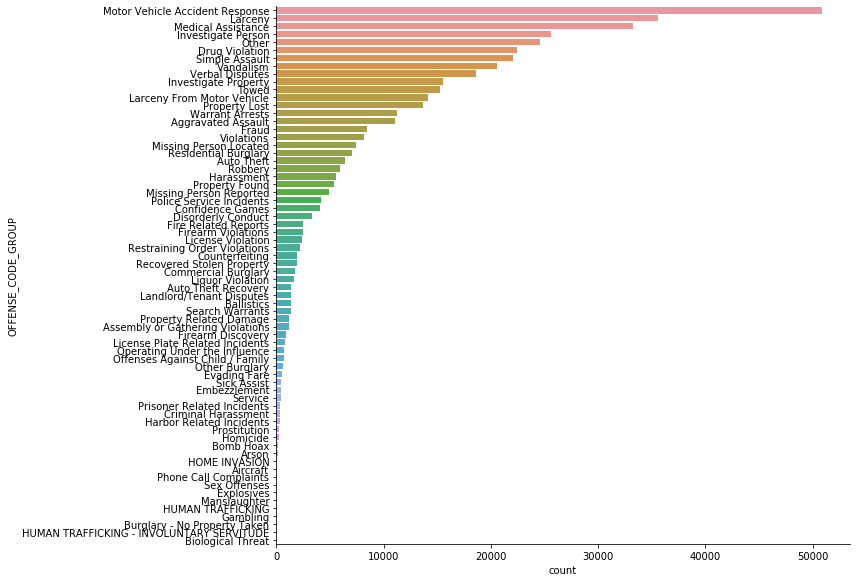

In [168]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=ab.OFFENSE_CODE_GROUP.value_counts().index,
           data=ab)

In [169]:
ab.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                2229
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               10891
STREET                 13524
Lat                    37985
Long                   37985
Location                   0
dtype: int64

In [170]:
ab

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,Aggravated Assault,ASSAULT - AGGRAVATED,External,,0.0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92089785,3005,Sick Assist,SICK ASSIST,E13,574,0.0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I90583827,1402,Vandalism,VANDALISM,E18,498,0.0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192082859,724,Auto Theft,AUTO THEFT,E18,519,0.0,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,I192082751,724,Auto Theft,AUTO THEFT,E18,493,0.0,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
5,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,0.0,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
6,I192082577,724,Auto Theft,AUTO THEFT,D4,130,0.0,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"
7,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,0.0,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)"
8,I192078648,3114,Investigate Property,INVESTIGATE PROPERTY,B3,427,0.0,2019-09-29 06:39:00,2019,9,Sunday,6,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
9,I192078647,3115,Investigate Person,INVESTIGATE PERSON,A1,,0.0,2019-09-29 03:45:00,2019,9,Sunday,3,Part Three,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)"


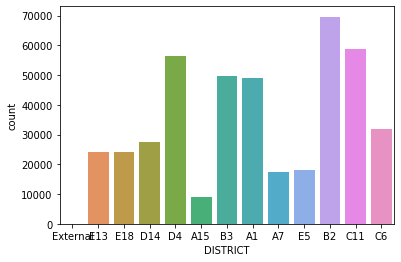

In [171]:
sns.countplot(data=ab, x = 'DISTRICT', label='Count')

In [172]:
l = ab.loc[ab.DISTRICT=='A1']['REPORTING_AREA']
l

9            
14         75
15         75
26        111
33        119
80        123
81        123
82        123
83        123
84         75
114          
134       119
155       114
157       111
158          
159        75
165       105
191        77
208       128
217       111
221        93
225       127
245        70
252        92
262        61
268       110
269        64
272        61
278       109
296        84
         ... 
437275       
437283    104
437313     65
437318     77
437340    102
437384     92
437425     94
437437    173
437462     87
437465    125
437469    954
437478       
437479       
437480     65
437481     84
437486    117
437504     92
437505    127
437550     67
437554       
437555     94
437565     70
437574     92
437582    119
437586    102
437589    117
437590     77
437598    112
437605    119
437609    117
Name: REPORTING_AREA, Length: 48890, dtype: object

In [173]:
g = []
for i in ab.OFFENSE_CODE_GROUP.unique():
    g.append(i)
print(len(g))

68
